In [ ]:
"""Q-1. Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted."""

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
data = pd.read_csv('instagram_reach.csv') 

# Preprocessing
# Remove unnecessary columns
data = data.drop(columns=['Unnamed: 0'])

# Convert 'Time since posted' column to numerical representation
def convert_time(time_str):
    if 'hour' in time_str:
        return int(time_str.split()[0])
    elif 'day' in time_str:
        return int(time_str.split()[0]) * 24
    else:
        return 0

data['Time since posted'] = data['Time since posted'].map(convert_time)

# Split the data into input features (X) and target variables (y)
X = data.drop(columns=['Likes', 'Time since posted'])
y_likes = data['Likes']
y_time_since_posted = data['Time since posted']

# Perform one-hot encoding for categorical features
categorical_features = ['USERNAME', 'Caption', 'Hashtags']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Split the encoded data into training and testing sets
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(
    X_encoded, y_likes, y_time_since_posted, test_size=0.2, random_state=42
)

# Model training - Likes Prediction
likes_model = LinearRegression()
likes_model.fit(X_train, y_likes_train)

# Model training - Time Since Posted Prediction
time_model = LinearRegression()
time_model.fit(X_train, y_time_train)

# Model evaluation - Likes Prediction
likes_predictions = likes_model.predict(X_test)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
likes_mae = mean_absolute_error(y_likes_test, likes_predictions)
print("Likes Prediction - MSE:", likes_mse)
print("Likes Prediction - MAE:", likes_mae)

# Model evaluation - Time Since Posted Prediction
time_predictions = time_model.predict(X_test)
time_mse = mean_squared_error(y_time_test, time_predictions)
time_mae = mean_absolute_error(y_time_test, time_predictions)
print("Time Since Posted Prediction - MSE:", time_mse)
print("Time Since Posted Prediction - MAE:", time_mae)


Likes Prediction - MSE: 2006.3543853627139
Likes Prediction - MAE: 29.57780028246007
Time Since Posted Prediction - MSE: 13.819128705699267
Time Since Posted Prediction - MAE: 2.378781218619751


In [3]:
""" Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes."""ObesityDataSet_raw_and_data_sinthetic.csv

' Imagine you have a dataset where you have different features like Age ,\nGender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into\ndifferent classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using\nany 4 different classification algorithms. Now you have to build a model which\ncan classify people into different classes.'

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load the dataset
data_Obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')  

In [6]:
data_Obesity.columns 

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [7]:
X = data_Obesity[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
          'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
          'CALC', 'MTRANS']]
y = data_Obesity['NObeyesdad']

In [12]:
le = LabelEncoder()
for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']:
    X.loc[:, col] = le.fit_transform(X.loc[:, col])

C:\Users\Lagartha Lothbroke\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Lagartha Lothbroke\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Users\Lagartha Lothbroke\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [13]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X.loc[:, numerical_cols] = scaler.fit_transform(X.loc[:, numerical_cols])

C:\Users\Lagartha Lothbroke\anaconda3\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_report = classification_report(y_test, dt_predictions)


In [16]:
# K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)


In [17]:
# Logistic Regression Classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)

# Support Vector Machine Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_report = classification_report(y_test, svm_predictions)

# Print accuracy and classification reports for each classifier
print("Decision Tree Classifier Accuracy:", dt_accuracy)
print("Decision Tree Classifier Report:\n", dt_report)

print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classifier Report:\n", knn_report)

print("Logistic Regression Classifier Accuracy:", lr_accuracy)
print("Logistic Regression Classifier Report:\n", lr_report)

print("Support Vector Machine Classifier Accuracy:", svm_accuracy)
print("Support Vector Machine Classifier Report:\n", svm_report)



C:\Users\Lagartha Lothbroke\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Classifier Accuracy: 0.9432624113475178
Decision Tree Classifier Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.98      0.95        56
      Normal_Weight       0.90      0.89      0.89        62
     Obesity_Type_I       0.96      0.92      0.94        78
    Obesity_Type_II       0.93      0.95      0.94        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.91      0.91        56
Overweight_Level_II       0.98      0.96      0.97        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423

K-Nearest Neighbors Classifier Accuracy: 0.8203309692671394
K-Nearest Neighbors Classifier Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.76      0.96      0.85        56
      Normal_We

In [ ]:
"""Q-3. Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data."""

In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.metrics import jaccard_score


# Load the dataset
data_News = pd.read_json('News_Category_Dataset_v3.json', lines=True, convert_axes=True)

In [47]:
data_News.head(5)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [48]:
data_News.shape

(209527, 6)

In [49]:
data_News.info

<bound method DataFrame.info of                                                      link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The F

In [50]:
data_News.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [51]:
data_News.duplicated().sum()

13

In [52]:
data_news=data_News.drop_duplicates()

In [53]:
data_News.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [55]:
# Select the relevant data for similarity comparison
data_News['news_data'] = data_News['headline']+' '+data_News['short_description']


In [56]:
data_News = data_News.drop(["link", "authors", "category", "date", "short_description"],axis = 1)

In [57]:
data_News

,headline,news_data
0,Over 4 Million Americans Roll Up Sleeves For O...,Over 4 Million Americans Roll Up Sleeves For O...
1,"American Airlines Flyer Charged, Banned For Li...","American Airlines Flyer Charged, Banned For Li..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,23 Of The Funniest Tweets About Cats And Dogs ...
3,The Funniest Tweets From Parents This Week (Se...,The Funniest Tweets From Parents This Week (Se...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Woman Who Called Cops On Black Bird-Watcher Lo...
...,...,...
209522,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...
209523,Maria Sharapova Stunned By Victoria Azarenka I...,Maria Sharapova Stunned By Victoria Azarenka I...
209524,"Giants Over Patriots, Jets Over Colts Among M...","Giants Over Patriots, Jets Over Colts Among M..."
209525,Aldon Smith Arrested: 49ers Linebacker Busted ...,Aldon Smith Arrested: 49ers Linebacker Busted ...


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [62]:
vectorizer = TfidfVectorizer()
features   = vectorizer.fit_transform(data_News['headline'])

In [63]:
vectorized_query = vectorizer.transform(['data_news'])

In [65]:
# Cosine Similarity
cosine_similarities = pairwise_distances(vectorized_query, features , metric='cosine').flatten()
most_similar_cosine = data_news.iloc[cosine_similarities.argmin()]

In [66]:
# Euclidean Distance
euclidean_distances = pairwise_distances(vectorized_query, features , metric='euclidean').flatten()
most_similar_euclidean = data_news.iloc[euclidean_distances.argmin()]


In [67]:
# Manhattan Distance
manhattan_distances = pairwise_distances(vectorized_query, features , metric='manhattan').flatten()
most_similar_manhattan = data_news.iloc[manhattan_distances.argmin()]

In [74]:
# Print the most similar data based on each similarity algorithm
print("Most Similar Data (Cosine Similarity):", most_similar_cosine)
print("Most Similar Data (Euclidean Distance):", most_similar_euclidean)
print("Most Similar Data (Manhattan Distance):", most_similar_manhattan)

Most Similar Data (Cosine Similarity): link                 https://www.huffpost.com/entry/covid-boosters-...
headline             Over 4 Million Americans Roll Up Sleeves For O...
category                                                     U.S. NEWS
short_description    Health experts said it is too early to predict...
authors                                           Carla K. Johnson, AP
date                                               2022-09-23 00:00:00
Name: 0, dtype: object
Most Similar Data (Euclidean Distance): link                 https://www.huffingtonpost.com/entry/l-o-v-e_b...
headline                                                       L O V E
category                                                HEALTHY LIVING
short_description                                                     
authors              SOE MOE LWIN, ContributorArtist and Explorer, ...
date                                               2016-06-05 00:00:00
Name: 65619, dtype: object
Most Similar Data (

In [72]:
"""Q-4. Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm"""

In [75]:
import pandas as pd
df_shoppers=pd.read_csv('online_shoppers_intention.csv')


In [76]:
df_shoppers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [138]:
df_shoppers.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [78]:
df_shoppers.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [86]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [101]:
# Separate the features and target variables
X = df_shoppers[['Administrative', 'Administrative_Duration', 'Informational', 'ProductRelated',
          'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
          'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']]
y_revenue = df_shoppers['Revenue'].astype(int)
y_weekend = df_shoppers['Weekend']
informational_duration = df_shoppers['Informational_Duration']


In [102]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

In [103]:
X_train, X_test, y_revenue_train, y_revenue_test, y_weekend_train, y_weekend_test, informational_duration_train, informational_duration_test = train_test_split(X, y_revenue, y_weekend, informational_duration, test_size=0.2, random_state=42)


In [104]:
#Create an ensemble model for Revenue prediction
revenue_model = RandomForestClassifier()
revenue_model.fit(X_train, y_revenue_train)


RandomForestClassifier()

In [105]:
#prediction
y_revenue_pred = revenue_model.predict(X_test)


In [106]:
revenue_accuracy = accuracy_score(y_revenue_test, y_revenue_pred)
print("Revenue Accuracy:", revenue_accuracy)


Revenue Accuracy: 0.8925385239253852


In [107]:
weekend_model = RandomForestClassifier()
weekend_model.fit(X_train, y_weekend_train)

RandomForestClassifier()

In [108]:
y_weekend_pred = weekend_model.predict(X_test)

In [109]:
weekend_accuracy = accuracy_score(y_weekend_test, y_weekend_pred)
print("Weekend Accuracy:", weekend_accuracy)

Weekend Accuracy: 1.0


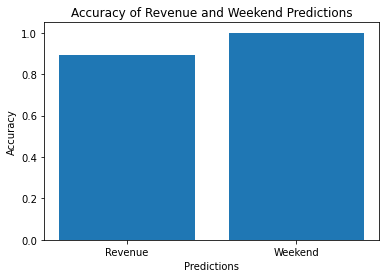

In [110]:
labels = ['Revenue', 'Weekend']
accuracies = [revenue_accuracy, weekend_accuracy]
plt.bar(labels, accuracies)
plt.xlabel('Predictions')
plt.ylabel('Accuracy')
plt.title('Accuracy of Revenue and Weekend Predictions')
plt.show()

In [111]:
#informational_duration_pred = revenue_model.predict(informational_duration_test)
informational_duration_model = RandomForestRegressor()
informational_duration_model.fit(X_train, informational_duration_train)

RandomForestRegressor()

In [112]:
informational_duration_pred = informational_duration_model.predict(X_test)

In [113]:
informational_duration_pred


array([  0.        , 262.36735   ,   0.        , ...,  63.6245    ,
       441.43252976,   0.        ])

In [114]:
## Calculate mean squared error for Revenue predictions
revenue_mse = mean_squared_error(y_revenue_test, y_revenue_pred)

In [115]:
revenue_mse

0.10746147607461476

In [116]:
print("Classification Report for Revenue:")
print(classification_report(y_revenue_test, y_revenue_pred))


Classification Report for Revenue:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.54      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.89      2466



In [117]:
print("Classification Report for Weekend:")
print(classification_report(y_weekend_test, y_weekend_pred))


Classification Report for Weekend:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1846
        True       1.00      1.00      1.00       620

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466



C:\Users\Lagartha Lothbroke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


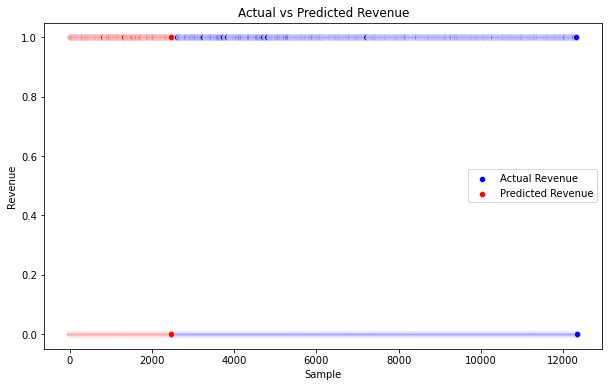

In [137]:
# Plotting the Revenue predictions
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(range(len(y_revenue)), y_revenue, color='blue', label='Actual Revenue')
sns.scatterplot(range(len(y_revenue_pred)), y_revenue_pred, color='red', label='Predicted Revenue')
plt.xlabel('Sample')
plt.ylabel('Revenue')
plt.title('Actual vs Predicted Revenue')
plt.legend()
plt.show()

C:\Users\Lagartha Lothbroke\AppData\Local\Temp/ipykernel_28652/1708894746.py:5: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  weekend_pred_labels = [weekend_labels[val] for val in y_weekend_pred]
C:\Users\Lagartha Lothbroke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lagartha Lothbroke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


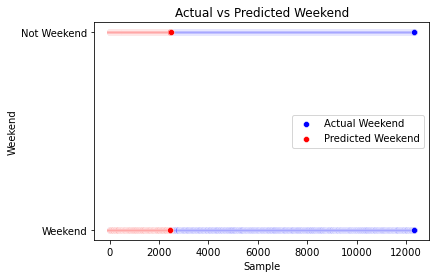

In [135]:

# Plotting the Weekend predictions
import seaborn as sns
weekend_labels = ['Not Weekend', 'Weekend']
weekend_test_labels = [weekend_labels[val] for val in y_weekend]
weekend_pred_labels = [weekend_labels[val] for val in y_weekend_pred]

sns.scatterplot(range(len(weekend_test_labels)), weekend_test_labels, color='blue', label='Actual Weekend')
sns.scatterplot(range(len(weekend_pred_labels)), weekend_pred_labels, color='red', label='Predicted Weekend')
plt.xlabel('Sample')
plt.ylabel('Weekend')
plt.title('Actual vs Predicted Weekend')
plt.legend()
plt.show()


In [139]:
"""Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data"""


'Q-5. Uber is a taxi service provider as we know, we need to predict the high\nbooking area using an Unsupervised algorithm and price for the location using a\nsupervised algorithm and use some map function to display the data'

In [140]:
import pandas as pd
df_rideshare=pd.read_csv('rideshare_kaggle.csv')

In [143]:
df_rideshare.head(5)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [144]:
df_rideshare.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [145]:
df_rideshare.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [146]:
df_rideshare.duplicated().sum()

0

In [147]:
df_rideshare = df_rideshare[['latitude', 'longitude', 'price', 'distance', 'surge_multiplier']]

In [149]:
df_rideshare=df_rideshare.dropna()


In [154]:
df_rideshare.columns

Index(['latitude', 'longitude', 'price', 'distance', 'surge_multiplier'], dtype='object')

In [ ]:
##unsupervised

In [155]:
unsupervised_features = ['latitude', 'longitude']

In [156]:
# Apply K-means clustering
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
kmeans = KMeans(n_clusters=5)
df_rideshare['cluster_label'] = kmeans.fit_predict(df_rideshare[unsupervised_features])

C:\Users\Lagartha Lothbroke\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [157]:
#supervised
supervised_features = ['latitude', 'longitude', 'distance', 'surge_multiplier']
target = 'price'

In [158]:
X_train, X_test, y_train, y_test = train_test_split(df_rideshare[supervised_features], df_rideshare[target], test_size=0.2, random_state=42)


In [159]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression()

In [160]:
price_pred = reg_model.predict(X_test)

In [164]:
!pip install folium

     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00


In [165]:
import folium
map_center = [df_rideshare['latitude'].mean(), df_rideshare['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

In [166]:
# Plot high booking areas
for index, row in df_rideshare.iterrows():
    if row['cluster_label'] == 1:  
        folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='red')).add_to(m)
    else:
        folium.Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='blue')).add_to(m)

In [167]:
m.save('map.html')